[View in Colaboratory](https://colab.research.google.com/github/himu30/Machine_learning_with_python/blob/master/assignment_15.ipynb)

# Assignment - 15  SVM(support Vector Machine)

In [0]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Q-1.) Loading Datset from sklearn**

In [4]:
#Importing Dataset from sklearn
from sklearn.datasets import load_digits
digit = load_digits()
print(digit.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
#shape of dataset
digit.data.shape

(1797, 64)

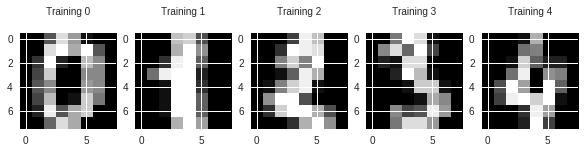

In [9]:

#look of image in digit dataset
plt.figure(figsize = (10,4))
for index, (image,label) in enumerate(zip(digit.data[0:5], digit.target[0:5])):
  plt.subplot(1, 5, index+1)
  plt.imshow(np.reshape(image ,(8,8)), cmap=plt.cm.gray)
  plt.title('Training %i\n'%label,fontsize = 10)

**Q-2.) Splitting of dataset into training and dataset**

In [0]:
#splitting of mnist dataset into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digit.data , digit.target , test_size = 0.4, random_state= 20)

**Q-3.)USE OF SVM KERNELS**

In [17]:
#Use of SVM Kernels
from sklearn.svm import SVC
svm_clf = SVC()

#fitting into SVM model
svm_clf.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
#Use of Linear SVM Kernel
from sklearn.svm import LinearSVC
lin_svm = LinearSVC()

lin_svm.fit(x_train , y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [0]:
#Linear SVM Prediction
lin_pred = lin_svm.predict(x_test)

In [20]:
#confusion matrix for Linear kernel
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,lin_pred)

array([[62,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 71,  0,  2,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 60,  1,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 77,  0,  0,  0,  0,  2,  1],
       [ 0,  1,  0,  0, 74,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 68,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  2, 69,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 78,  0,  2],
       [ 0,  4,  2,  1,  0,  0,  2,  1, 54,  0],
       [ 0,  1,  0,  1,  0,  1,  0,  0,  5, 69]])

In [21]:
#classification report for linear svm kernel
from sklearn.metrics import classification_report
classification_report(y_test ,lin_pred)

'             precision    recall  f1-score   support\n\n          0       0.98      0.98      0.98        63\n          1       0.92      0.95      0.93        75\n          2       0.95      0.95      0.95        63\n          3       0.94      0.96      0.95        80\n          4       1.00      0.99      0.99        75\n          5       0.96      0.96      0.96        71\n          6       0.97      0.97      0.97        71\n          7       0.99      0.97      0.98        80\n          8       0.83      0.84      0.84        64\n          9       0.93      0.90      0.91        77\n\navg / total       0.95      0.95      0.95       719\n'

In [22]:
#Linear svm performance
lin_svm.score(x_test , y_test)

0.9485396383866481

**Use of SVM with Gaussian KERNEL**

In [41]:
#RBF or Gaussian kernel
rbf_svm = SVC(kernel = "rbf")
rbf_svm.fit(x_train ,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
#prediction using rbf kernel
rbf_pred = rbf_svm.predict(x_test)

#Confusion matrix for rbf kernel
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rbf_pred)

array([[47,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 12,  0, 68,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21, 54,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 71,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 67,  0, 13,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0, 70,  0,  0,  0,  7]])

In [29]:
#classification report for RBF kernel using svm
from sklearn.metrics import classification_report
classification_report(y_test ,rbf_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      0.75      0.85        63\n          1       1.00      0.32      0.48        75\n          2       1.00      0.94      0.97        63\n          3       1.00      0.15      0.26        80\n          4       1.00      0.28      0.44        75\n          5       0.15      1.00      0.27        71\n          6       1.00      0.59      0.74        71\n          7       1.00      0.16      0.28        80\n          8       1.00      0.55      0.71        64\n          9       1.00      0.09      0.17        77\n\navg / total       0.92      0.46      0.50       719\n'

In [31]:
#Model performance
rbf_svm.score(x_test,y_test)

0.4603616133518776

**Use of SVM with Polynomial Kernel **

In [43]:
#Polynomial kernel
pol_svm = SVC(kernel = "poly")
pol_svm.fit(x_train ,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
#prediction using polunomial kernel
pol_pred = pol_svm.predict(x_test)

#Confusion matrix for polynomial kernel
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pol_pred)

array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 75,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 63,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 77,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 75,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 70,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  1, 69,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 79,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 64,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  1,  0, 73]])

In [45]:
#classification report for polynomial kernel using svm
from sklearn.metrics import classification_report
classification_report(y_test ,pol_pred)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        63\n          1       0.99      1.00      0.99        75\n          2       1.00      1.00      1.00        63\n          3       1.00      0.96      0.98        80\n          4       1.00      1.00      1.00        75\n          5       0.92      0.99      0.95        71\n          6       1.00      0.97      0.99        71\n          7       0.98      0.99      0.98        80\n          8       1.00      1.00      1.00        64\n          9       0.97      0.95      0.96        77\n\navg / total       0.99      0.98      0.98       719\n'

In [46]:
#Model performance
pol_svm.score(x_test,y_test)

0.9847009735744089

**Use of SVM with sigmoid kernel**

In [47]:
#Sigmoid kernel
sig_svm = SVC(kernel = "sigmoid")
sig_svm.fit(x_train ,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
#prediction using sigmoid kernel
sig_pred = sig_svm.predict(x_test)

#Confusion matrix for polynomial kernel
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,sig_pred)

array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [75,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [80,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [75,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [71,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [71,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [80,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [64,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [77,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [49]:
#classification report for polynomial kernel using svm
from sklearn.metrics import classification_report
classification_report(y_test ,sig_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.09      1.00      0.16        63\n          1       0.00      0.00      0.00        75\n          2       0.00      0.00      0.00        63\n          3       0.00      0.00      0.00        80\n          4       0.00      0.00      0.00        75\n          5       0.00      0.00      0.00        71\n          6       0.00      0.00      0.00        71\n          7       0.00      0.00      0.00        80\n          8       0.00      0.00      0.00        64\n          9       0.00      0.00      0.00        77\n\navg / total       0.01      0.09      0.01       719\n'

In [50]:
#Model performance
sig_svm.score(x_test,y_test)

0.08762169680111266